# ETF Analysis 2

ETF Project 1


#### Initialize Python Packages


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### Read Data


In [2]:
file_path = 'finans2_data.csv'

# Load data
D = pd.read_csv(file_path, sep=';')

# Change name of column Geo.mean to Geo_mean, due to the period can cause issues
D = D.rename(columns={'Geo.mean': 'Geo_mean'})

# set index of dataframe to be ETF
D = D.set_index('ETF')
display(D)

,Geo_mean,Volatility,maxTuW
ETF,,,
SPY,0.104904,2.478601,309
MDY,0.139547,2.925897,327
EWJ,-0.026201,2.699671,327
EWH,0.112672,3.373114,302
EWG,0.050381,3.800206,177
...,...,...,...
IAU,0.125072,2.852106,333
SLV,0.029097,4.830741,333
USO,-0.275651,4.803064,319


### a) Descriptive analysis and summary


Dimension of DataFrame: (95, 3)
Some summary statistics:


,Geo_mean,Volatility,maxTuW
count,95.000000,95.000000,95.000000
mean,0.076904,3.059812,307.294737
std,0.080867,0.879042,42.767524
min,-0.275651,0.196579,172.000000
25%,0.028712,2.587946,309.000000
50%,0.082737,3.026361,324.000000
75%,0.134381,3.675211,327.000000
max,0.336390,4.830741,375.000000


Data types: Geo_mean      float64
Volatility    float64
maxTuW          int64
dtype: object


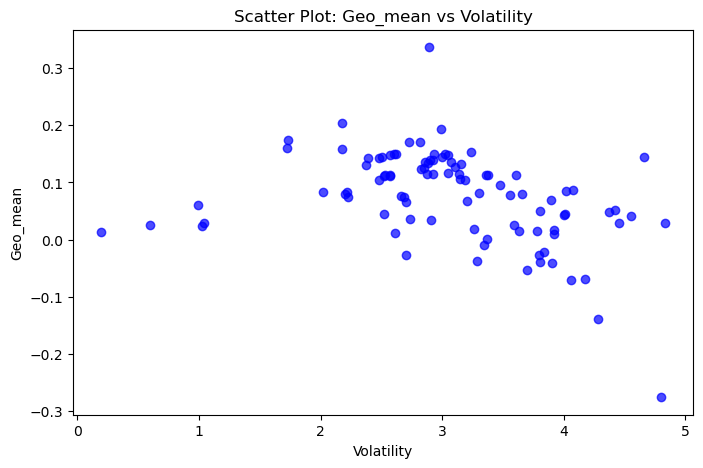

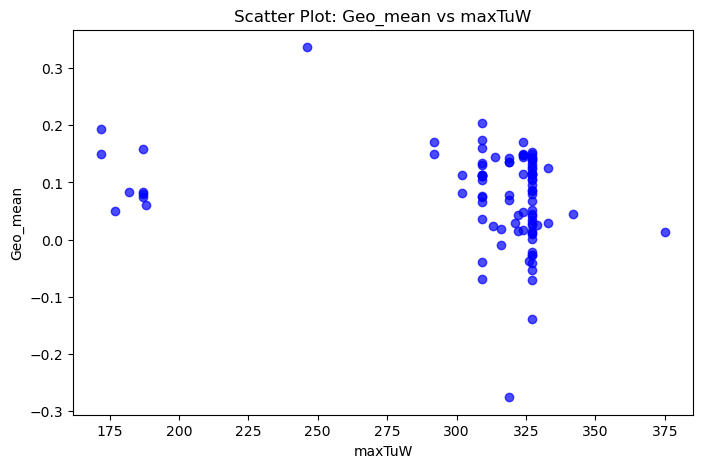

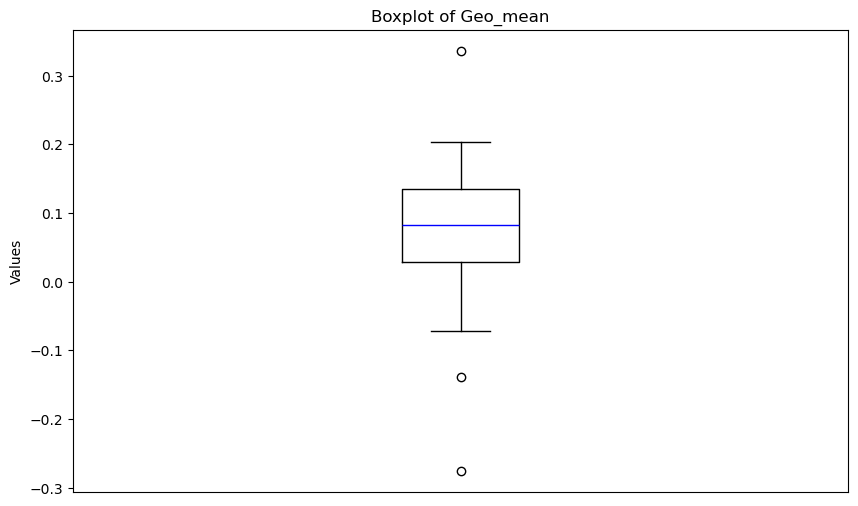

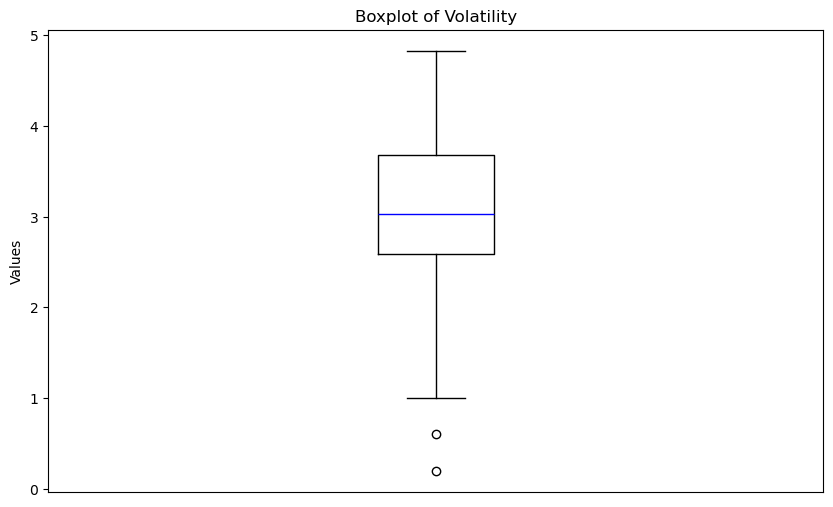

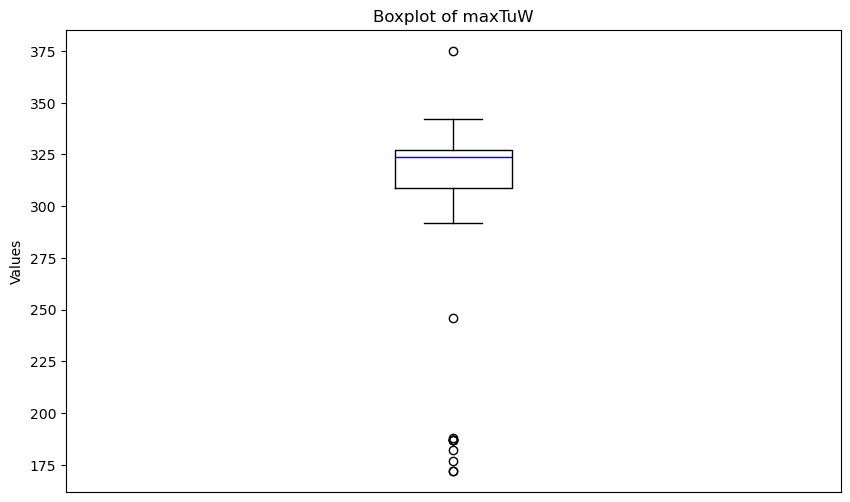

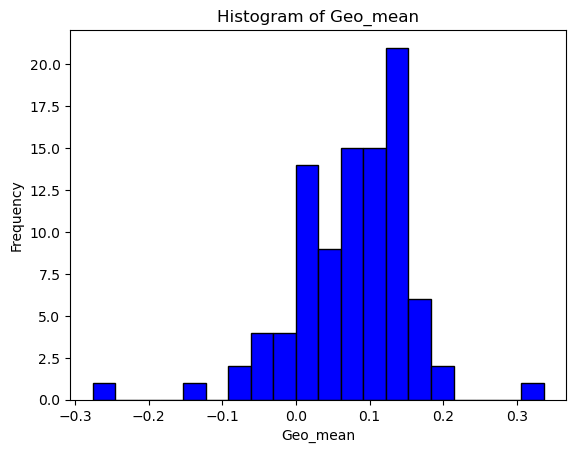

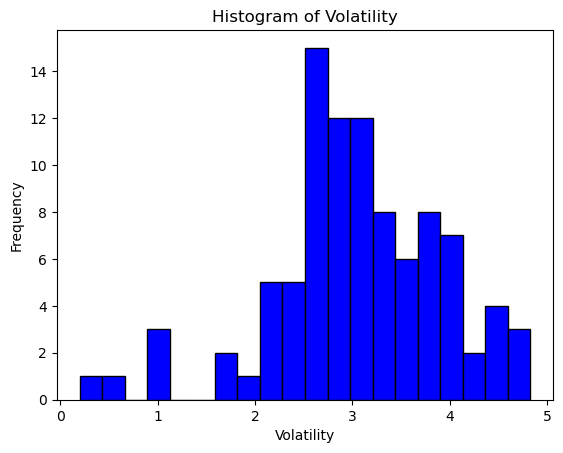

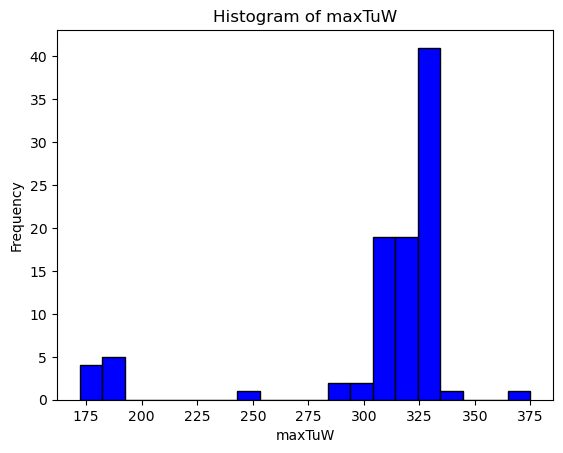

In [3]:
# Summary statistics
print(f"Dimension of DataFrame: {D.shape}")
print("Some summary statistics:")
display(D.describe())
print("Data types:", D.dtypes)


# Scatter plots
for variable in ['Volatility', 'maxTuW']:
    plt.figure(figsize=(8, 5))
    plt.scatter(D[variable], D['Geo_mean'], color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Geo_mean")
    plt.title(f"Scatter Plot: Geo_mean vs {variable}")
    plt.show()

# Boxplots
for variable in ['Geo_mean', 'Volatility', 'maxTuW']:
    plt.figure(figsize=(10, 6))
    plt.boxplot([D[variable],], medianprops=dict(color='blue'))
    plt.ylabel("Values")
    plt.xticks([])
    plt.title(f"Boxplot of {variable}")
    plt.show()

# Histograms
for variable in ['Geo_mean', 'Volatility', 'maxTuW']:
    plt.hist(D[variable], bins=20, color='blue',
             edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {variable}")
    plt.show()

#### Split the data

Save four ETF's for testing only. Use all the others for parameter estimation.


In [4]:
# Subset containing only AGG, VAW, IWN and SPY for validation
D_test = D[D.index.isin(['AGG', 'VAW', 'IWN', 'SPY'])]

# Subset containing all remaining ETFs for model estimation
D_model = D[~D.index.isin(['AGG', 'VAW', 'IWN', 'SPY'])]

#### c) Fitting the model - Estimating parameters


In [5]:
# Estimate multiple linear regression model
fit = smf.ols('Geo_mean ~ Volatility + maxTuW', data=D_model).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               Geo_mean   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.152
No. Observations:                  91   F-statistic:                     9.039
Covariance Type:            nonrobust   Prob (F-statistic):           0.000269
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2528      0.058      4.323      0.000       0.137       0.369
Volatility    -0.0351      0.010     -3.613      0.001      -0.054      -0.016
maxTuW        -0.0002      0.000     -1.154      0.252      -0.001       0.000

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or ot

In [6]:
# Residual variance
print(f"Estimated residual variance: {fit.mse_resid}")

Estimated residual variance: 0.005748415560134326


#### d) Model validation


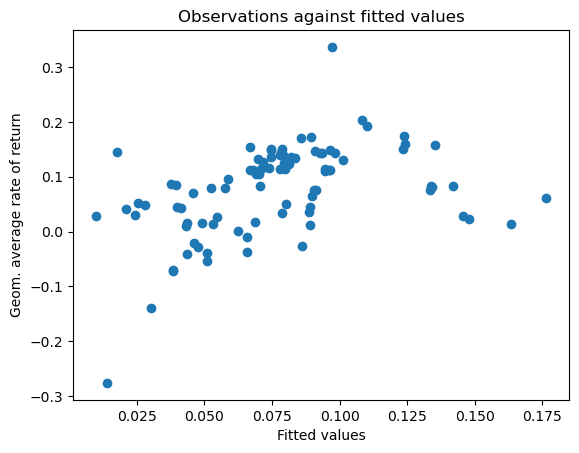

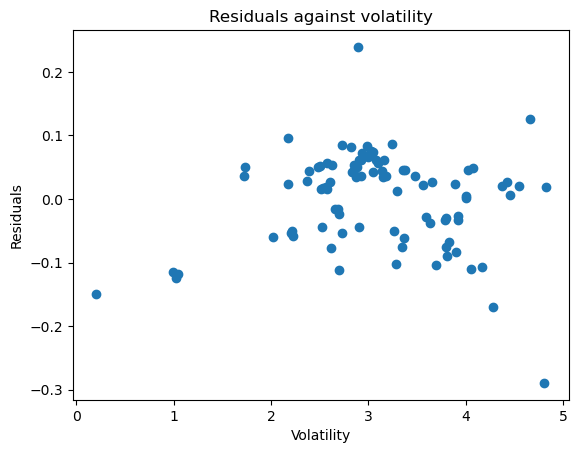

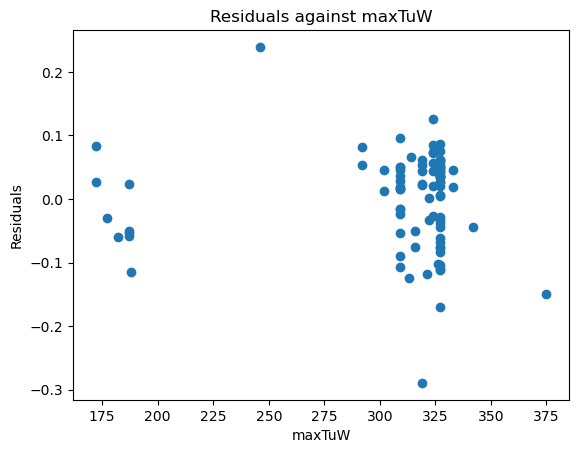

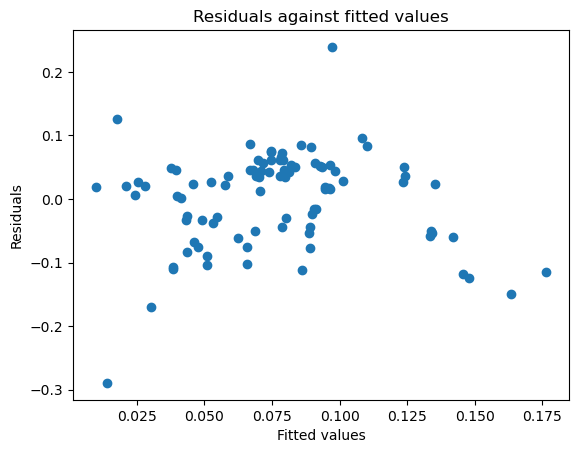

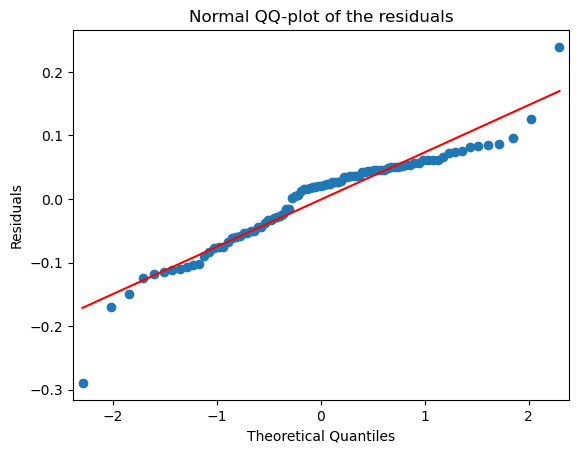

In [7]:
# Observations against fitted values
plt.scatter(fit.fittedvalues, D_model.Geo_mean)
plt.xlabel("Fitted values")
plt.ylabel("Geom. average rate of return")
plt.title("Observations against fitted values")
plt.show()

# Residuals against each of the explanatory variables
plt.scatter(D_model.Volatility, fit.resid)
plt.xlabel("Volatility")
plt.ylabel("Residuals")
plt.title("Residuals against volatility")
plt.show()

plt.scatter(D_model.maxTuW, fit.resid)
plt.xlabel("maxTuW")
plt.ylabel("Residuals")
plt.title("Residuals against maxTuW")
plt.show()


# Residuals against fitted values
plt.scatter(fit.fittedvalues, fit.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals against fitted values")
plt.show()

# Normal QQ-plot of the residuals
sm.qqplot(fit.resid, line='q')
plt.ylabel("Residuals")
plt.title("Normal QQ-plot of the residuals")
plt.show()

#### e) Confidence interval


In [8]:
print(stats.t.ppf(0.975, df=88))
display(D_test.describe())

1.987289864831169


,Geo_mean,Volatility,maxTuW
count,4.000000,4.000000,4.000000
mean,0.077473,2.471505,323.000000
std,0.040527,1.333774,9.380832
min,0.024794,0.597584,309.000000
25%,0.056335,2.008347,322.500000
50%,0.085876,2.840074,327.000000
75%,0.107014,3.303232,327.500000
max,0.113346,3.608286,329.000000


In [9]:
# Confidence intervals for the model coefficients
fit.conf_int(alpha=0.05)

,0,1
Intercept,0.136617,0.369062
Volatility,-0.054453,-0.015809
maxTuW,-0.000600,0.000159


### f) Hypothesis test


In [10]:
t_obs = (-0.0351-(-0.06)) / 0.010
print(t_obs)
p_value = 2*(1-stats.t.cdf(t_obs, df=88))
print(p_value)

2.4899999999999998
0.014653328286796663


#### g) Reducing the model


In [15]:
# Estimate new multiple linear regression model
fit = smf.ols('Geo_mean ~ Volatility', data=D_model).fit()
print(fit.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               Geo_mean   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.148
No. Observations:                  91   F-statistic:                     16.69
Covariance Type:            nonrobust   Prob (F-statistic):           9.62e-05
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1949      0.030      6.504      0.000       0.135       0.254
Volatility    -0.0382      0.009     -4.085      0.000      -0.057      -0.020

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [16]:
# Residual variance
print(f"Estimated residual variance: {fit.mse_resid}")

Estimated residual variance: 0.00576977833965149


#### h) Predictions


In [12]:
# Predictions and 95% prediction intervals
final_model = fit
pred = final_model.get_prediction(D_test).summary_frame(alpha=0.05)
pred.set_index(D_test.index, inplace=True)


# Observed values and predictions
# New dataframe
res = pd.DataFrame({'Geo_mean': D_test['Geo_mean'], 'pred': pred['mean'],
                   'pred_lower': pred['obs_ci_lower'], 'pred_upper': pred['obs_ci_upper']})
display(res)

,Geo_mean,pred,pred_lower,pred_upper
ETF,,,,
SPY,0.104904,0.100091,-0.052085,0.252266
IWN,0.066849,0.072449,-0.079323,0.224220
AGG,0.024794,0.172013,0.013358,0.330668
VAW,0.113346,0.056897,-0.095170,0.208964


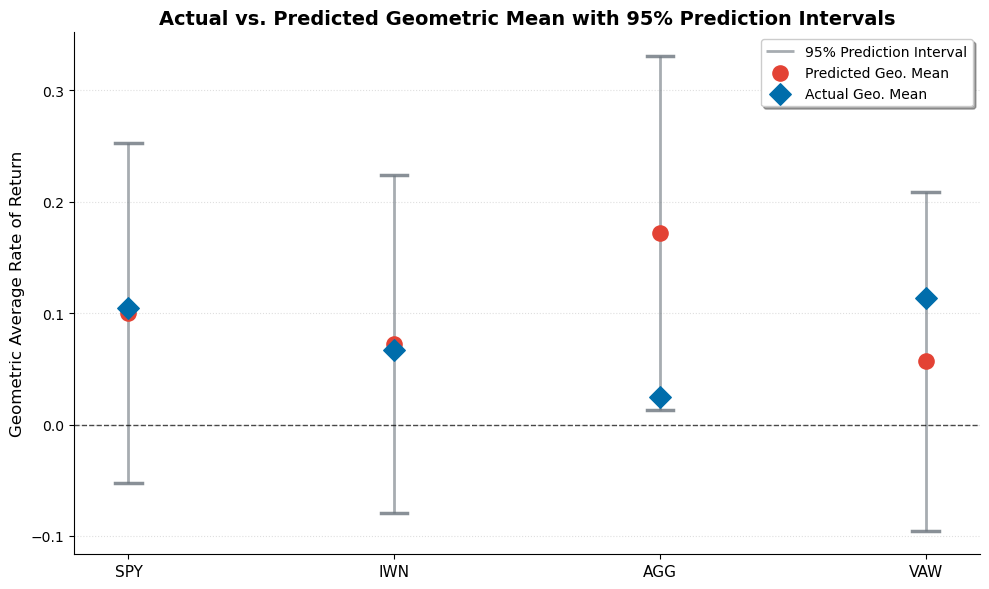

In [13]:
x = np.arange(len(res.index))
fig, ax = plt.subplots(figsize=(10, 6))

# Set a color scheme
pred_color = '#E34234'
actual_color = '#006DAB'
interval_color = '#6C757D'

# Plot the Prediction Interval (as vertical lines)
for i, (label, row) in enumerate(res.iterrows()):
    ax.vlines(
        x=x[i],
        ymin=row['pred_lower'],
        ymax=row['pred_upper'],
        color=interval_color,
        linestyle='-',
        linewidth=2,
        alpha=0.6,
        label='95% Prediction Interval' if i == 0 else ""
    )
    cap_width = 0.05
    ax.plot([x[i] - cap_width, x[i] + cap_width], [row['pred_lower'],
            row['pred_lower']], color=interval_color, linewidth=2.5, alpha=0.8)
    ax.plot([x[i] - cap_width, x[i] + cap_width], [row['pred_upper'],
            row['pred_upper']], color=interval_color, linewidth=2.5, alpha=0.8)


# Plot Predicted Geometric Mean (Red Circle)
ax.scatter(x, res['pred'],
           marker='o',
           s=120,
           color=pred_color,
           zorder=3,
           label='Predicted Geo. Mean')

# Plot Actual Geometric Mean (Blue Diamond)
ax.scatter(x, res['Geo_mean'],
           marker='D',
           s=120,
           color=actual_color,
           zorder=3,
           label='Actual Geo. Mean')

ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Actual vs. Predicted Geometric Mean with 95% Prediction Intervals',
             fontsize=14, fontweight='bold')
ax.set_ylabel('Geometric Average Rate of Return', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(res.index, fontsize=11)
ax.grid(axis='y', linestyle=':', alpha=0.4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper right', frameon=True, shadow=True)
plt.tight_layout()
plt.show()